In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
df_original = pd.read_csv("subway-data.csv")

df_original = df_original[df_original["Vehicle"] != 0]

In [3]:
#Data Trimmer

# Step 1: Calculate the frequency of each code
code_counts = df_original['Code'].value_counts()

# Step 2: Calculate the cumulative distribution of the counts
cumulative_freq = code_counts.cumsum() / code_counts.sum()

# Step 3: Find the 95% threshold for cumulative frequency
threshold_95 = cumulative_freq[cumulative_freq <= 0.95].index

# Step 4: Create a new column to filter out codes outside of the 95% distribution
df_original['95_percent_codes'] = df_original['Code'].where(df_original['Code'].isin(threshold_95))



In [4]:
df = df_original.dropna(subset=['95_percent_codes'])

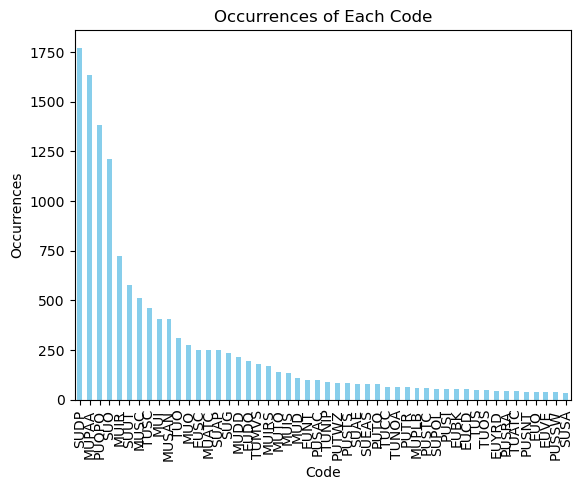

In [5]:
# Count the occurrences of each unique value in the 'Code' column
code_counts = df['95_percent_codes'].value_counts()

# Create a bar plot
code_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Code')
plt.ylabel('Occurrences')
plt.title('Occurrences of Each Code')

# Display the plot
plt.show()

In [41]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Create a new column for the mapped numerical values
df.loc[:, 'Day_numeric'] = label_encoder.fit_transform(df['Day'])

df.loc[:, 'station_numeric'] = label_encoder.fit_transform(df['Station'])

df.loc[:, 'line_numeric'] = label_encoder.fit_transform(df['Line'])

df.loc[:, 'vehicle_numeric'] = label_encoder.fit_transform(df['Vehicle'])

df.loc[:, 'code_numeric'] = label_encoder.fit_transform(df['95_percent_codes'])



# Categorize min_delay into bins (categories)
#bins = [0, 3, 10, 1000]  # Define bin edges
#labels = ['Average Delay','Slightly Above','Above Average Delay']  # Labels for the categories

bins = [0, 3, 1000]  # Define bin edges
labels = ['Average Delay', 'Above Average Delay']  # Labels for the categories


# Create a new column 'min_delay_category' for the categories
df.loc[:, 'min_delay_category'] = pd.cut(df['Min Delay'], bins=bins, labels=labels, right=False)


In [43]:
target = 'min_delay_category'
source1 = 'Day_numeric'
source2 = 'station_numeric'
source3 = 'line_numeric'
source4 = 'vehicle_numeric' #Huge overfitting
source5 = 'code_numeric'

#Working patterns
"""
3,5
"""

# Define features (X) and target (y)
X = df[[source3,source5]]  # Example features (add more if necessary)
y = df[target]  # Target: the categorized 'Min Delay'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, random_state=42, min_samples_leaf = 20, min_samples_split = 99)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Evaluate the model: Accuracy on training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Training Accuracy: 0.6885735623599701
Test Accuracy: 0.6893203883495146
